In [91]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [92]:
folder_path=r"C:\Users\LENOVO\Desktop\DATA AI\Github projects\NIFTY_50\NIFTY-50"
all_file=os.listdir(folder_path)
df_list=[pd.read_csv(os.path.join(folder_path,i)) for i in all_file]
df = pd.concat(df_list, ignore_index=True)

df_list = []
for file in all_file:
    file_path = os.path.join(folder_path, file)
    temp_df = pd.read_csv(file_path)
    
    # Create a new column 'Modified_Symbol' and assign the file name
    temp_df['Modified_Symbol'] = file.replace('.csv', '')  # Removing .csv extension
    
    df_list.append(temp_df)

# Concatenate all files into one DataFrame
df = pd.concat(df_list, ignore_index=True)

# Display first few rows to verify
print(df)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6672\1101329125.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(df_list, ignore_index=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6672\1101329125.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(df_list, ignore_index=True)
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookAp

In [93]:
df_summary=pd.read_csv(r"C:\Users\LENOVO\Desktop\DATA AI\Github projects\NIFTY_50\NIFTY-50 stock_metadata.csv")

In [94]:
df=df.merge(df_summary[['Symbol','Industry']],left_on='Modified_Symbol',right_on='Symbol',how='left')
df.head()

,Date,Symbol_x,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Modified_Symbol,Symbol_y,Industry
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612,ADANIPORTS,ADANIPORTS,SERVICES
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172,ADANIPORTS,ADANIPORTS,SERVICES
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088,ADANIPORTS,ADANIPORTS,SERVICES
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735,ADANIPORTS,ADANIPORTS,SERVICES
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741,ADANIPORTS,ADANIPORTS,SERVICES


In [95]:
df.Date=pd.to_datetime(df.Date)
df.drop('Symbol_y',axis=1,inplace=True)
df.rename(columns={'Symbol_x':'Symbol'},inplace=True)

In [96]:
df.isnull().sum()

Date                       0
Symbol                     0
Series                     0
Prev Close                 0
Open                       0
High                       0
Low                        0
Last                       0
Close                      0
VWAP                       0
Volume                     0
Turnover                   0
Trades                114848
Deliverable Volume     16077
%Deliverble            16077
Modified_Symbol            0
Industry                5306
dtype: int64

In [97]:
df[df['Industry'].isnull()].Modified_Symbol.unique()

array(['MM'], dtype=object)

In [98]:
# M&M belongs to AUTOMOBILE industry
df['Industry']=df['Industry'].fillna('AUTOMOBILE')

In [99]:
df.drop('Trades',axis=1,inplace=True)

In [100]:
pd.set_option('display.max_rows', None)  
df[df['Deliverable Volume'].isnull()].Symbol.value_counts()

Symbol
SUNPHARMA     528
HINDALC0      520
ZEETELE       519
ICICIBANK     517
HINDLEVER     515
TITAN         514
CIPLA         514
RELIANCE      514
ITC           514
SBIN          514
SESAGOA       513
TISCO         509
TELCO         509
ONGC          509
M&M           509
IOC           509
UTIBANK       509
WIPRO         509
ASIANPAINT    509
INFOSYSTCH    509
GRASIM        509
HEROHONDA     509
HDFCBANK      509
HDFC          509
BPCL          509
BRITANNIA     509
DRREDDY       509
EICHERMOT     504
HCLTECH       503
BAJAUTOFIN    446
KOTAKMAH      195
GAIL          188
INDUSINDBK    188
SHREECEM      188
BHARTI         11
UNIPHOS         6
TATAMOTORS      5
TATASTEEL       5
BHARTIARTL      5
HINDALCO        5
MARUTI          1
KOTAKBANK       1
Name: count, dtype: int64

In [101]:
median_values=df.groupby('Symbol')['Deliverable Volume'].median()
df['Deliverable Volume']=df['Deliverable Volume'].fillna(df['Symbol'].map(median_values))
df['%Deliverble']=df['Deliverable Volume']/df['Volume']

In [102]:
df.set_index('Date',inplace=True)

In [103]:
df.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Deliverable Volume',
       '%Deliverble', 'Modified_Symbol', 'Industry'],
      dtype='object')

In [104]:
df['Daily Return']=df['Close'] - df['Prev Close']
df['Daily Return (%)'] = ((df['Close'] - df['Prev Close']) / df['Prev Close']) * 100
df['Price Range'] = df['High'] - df['Low']
df['Intraday Return (%)'] = ((df['Close'] - df['Open']) / df['Open']) * 100
df['Volatility'] = df['Close'].rolling(window=7).std()  # 7-day Rolling Volatility

# Moving Averages
df['SMA_10'] = df['Close'].rolling(window=10).mean()  # 10-day Simple Moving Average
df['SMA_50'] = df['Close'].rolling(window=50).mean()  # 50-day SMA
df['EMA_10'] = df['Close'].ewm(span=10, adjust=False).mean()  # 10-day EMA

# Turnover-to-Volume Ratio
df['Turnover Ratio'] = df['Turnover'] / df['Volume']

# RSI Calculation
window_length = 14
delta = df['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=window_length).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=window_length).mean()
rs = gain / loss
df['RSI'] = 100 - (100 / (1 + rs))

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 235192 entries, 2007-11-27 to 2021-04-30
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Symbol               235192 non-null  object 
 1   Series               235192 non-null  object 
 2   Prev Close           235192 non-null  float64
 3   Open                 235192 non-null  float64
 4   High                 235192 non-null  float64
 5   Low                  235192 non-null  float64
 6   Last                 235192 non-null  float64
 7   Close                235192 non-null  float64
 8   VWAP                 235192 non-null  float64
 9   Volume               235192 non-null  object 
 10  Turnover             235192 non-null  float64
 11  Deliverable Volume   235192 non-null  float64
 12  %Deliverble          235192 non-null  object 
 13  Modified_Symbol      235192 non-null  object 
 14  Industry             235192 non-null  object 
 15  D

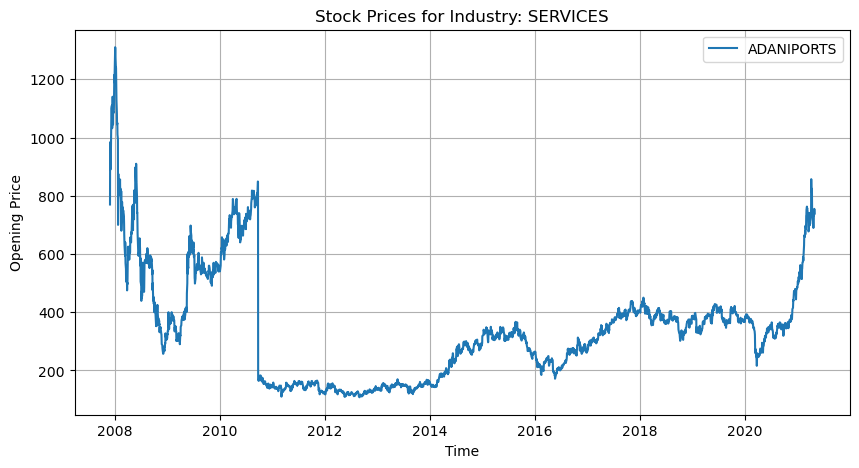

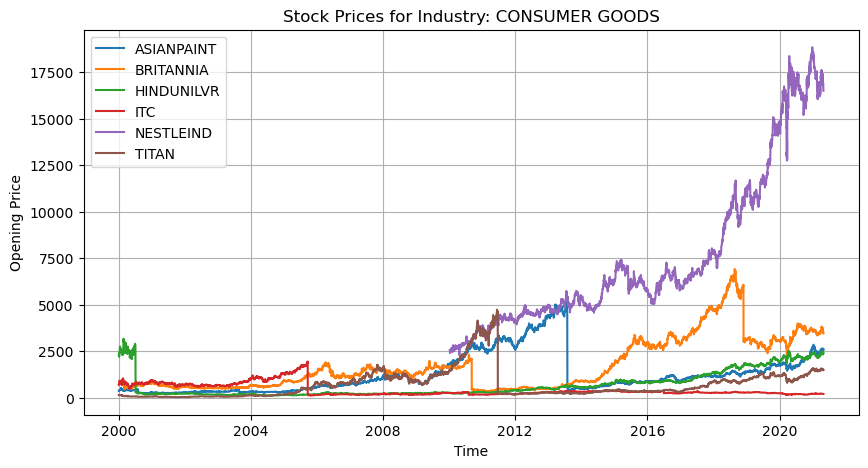

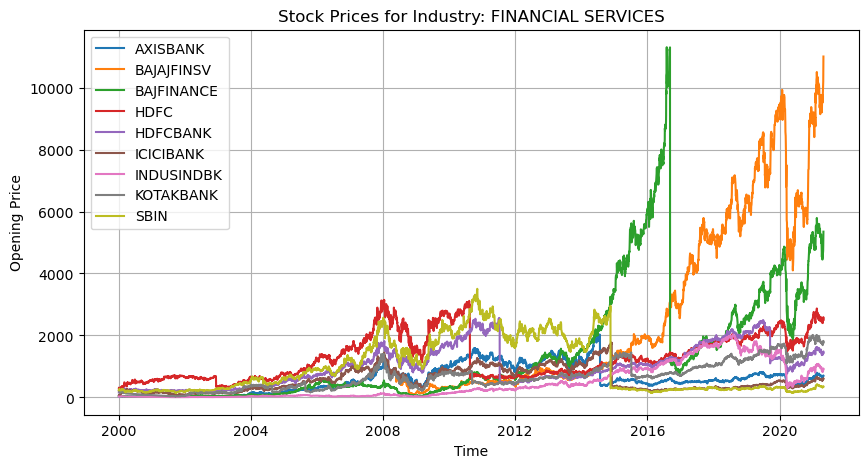

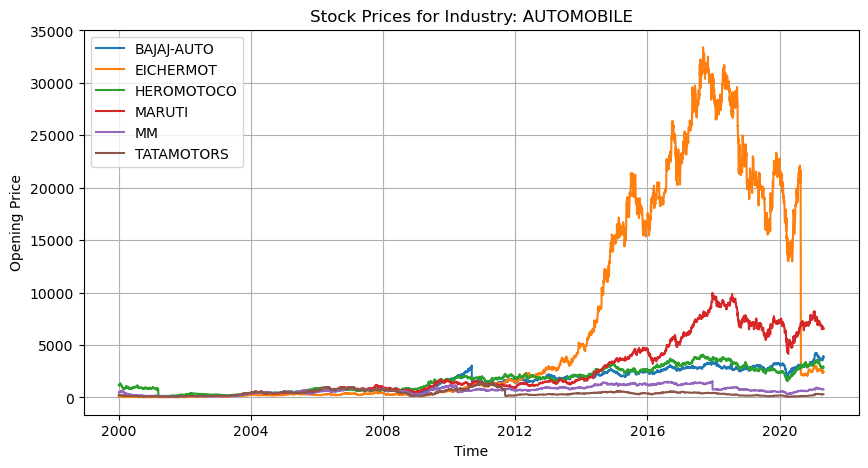

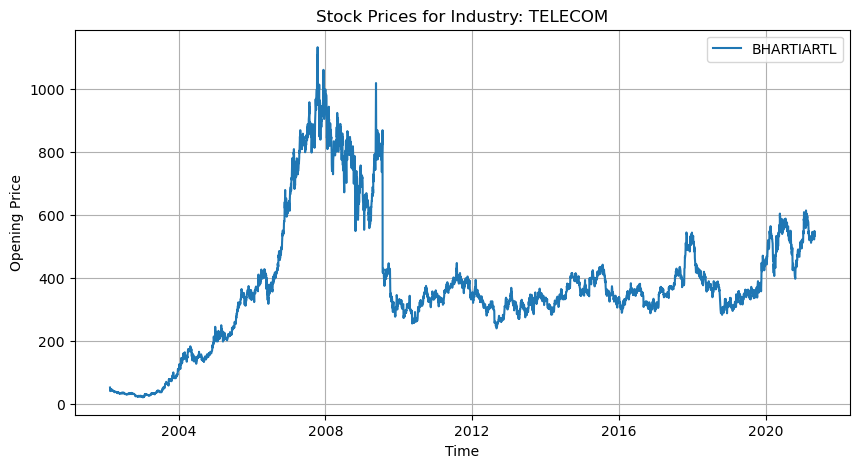

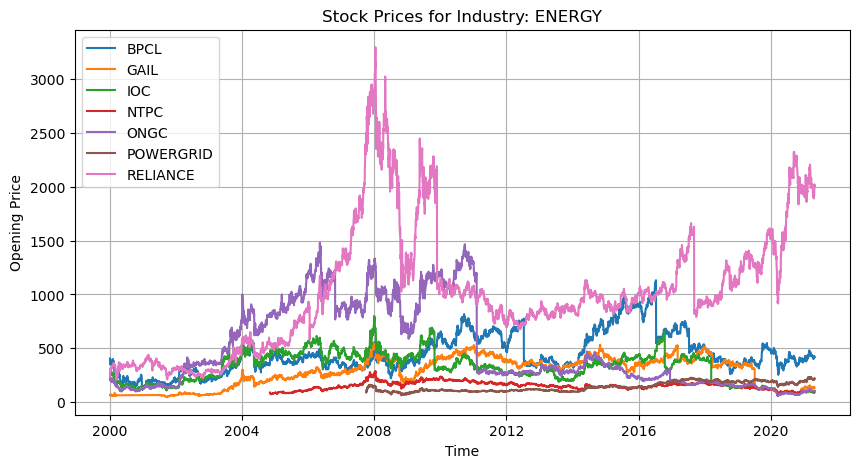

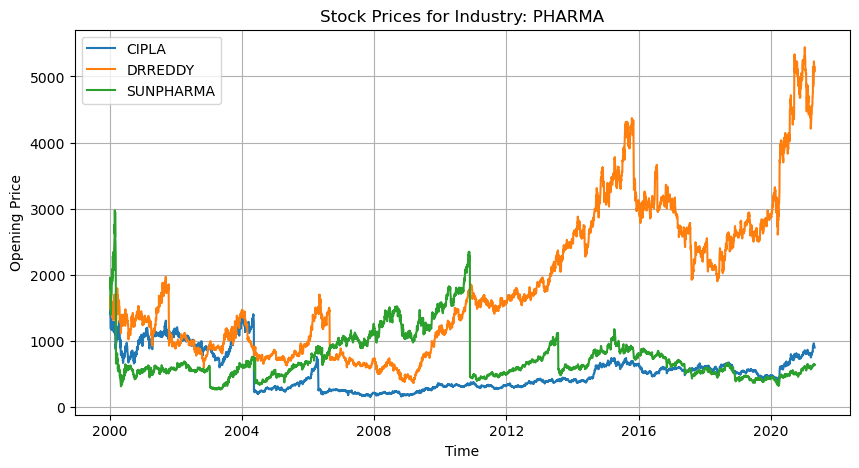

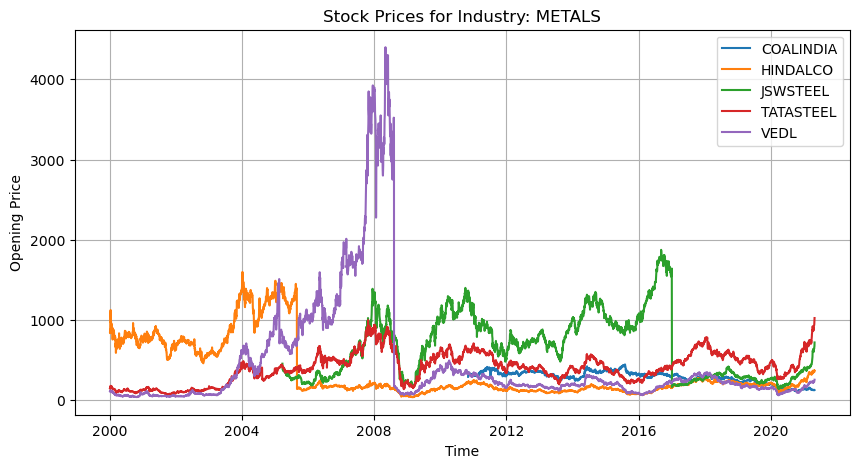

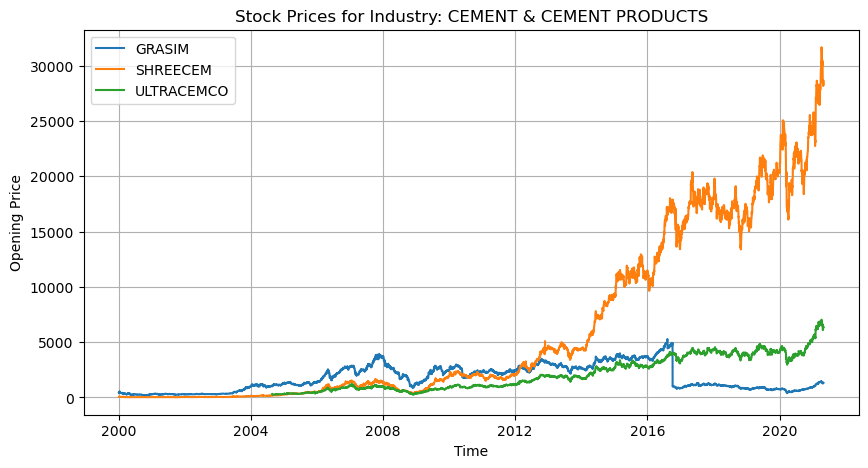

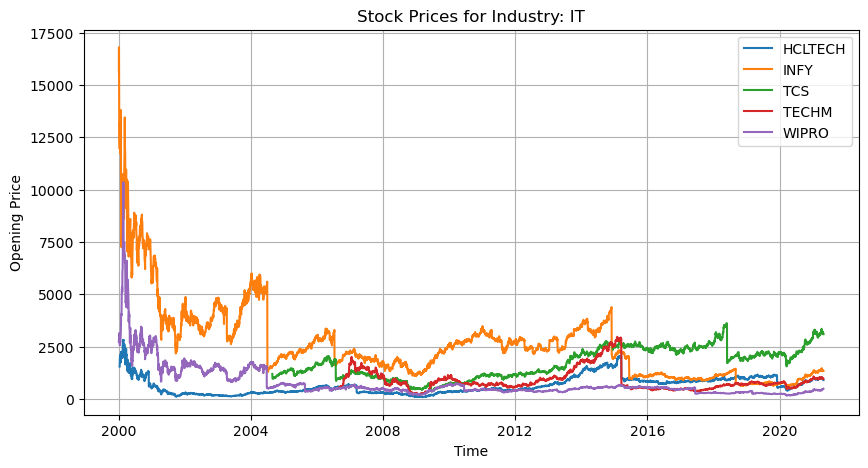

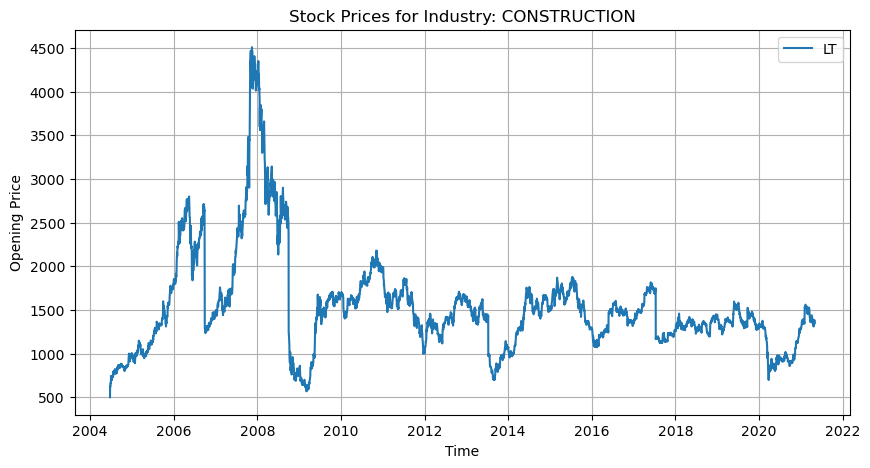

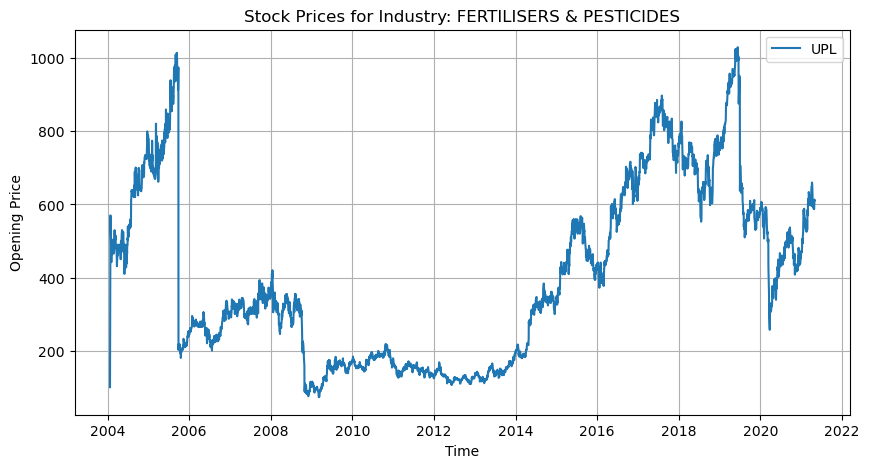

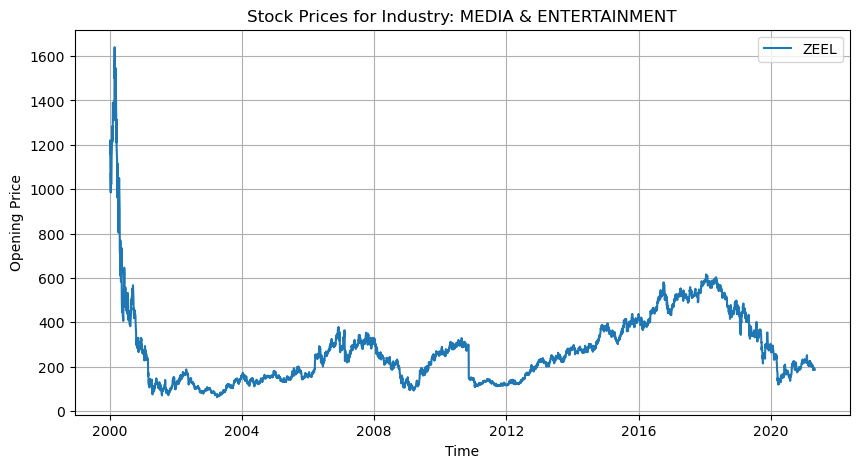

In [106]:
# Loop through each unique Industry
for industry in df['Industry'].unique():
    plt.figure(figsize=(10, 5))  # Create a new figure for each industry
    
    # Filter data for the specific industry
    industry_data = df[df['Industry'] == industry]

    # Loop through each stock in the industry
    for symbol in industry_data['Modified_Symbol'].unique():
        symbol_data = industry_data[industry_data['Modified_Symbol'] == symbol]
        plt.plot(symbol_data['Open'], label=symbol)  # Plot each stock
    
    # Set labels, title, legend
    plt.xlabel("Time")
    plt.ylabel("Opening Price")
    plt.title(f"Stock Prices for Industry: {industry}")
    plt.legend()
    plt.grid(True)

    # Show the graph after all stocks of an industry are plotted
    plt.show()


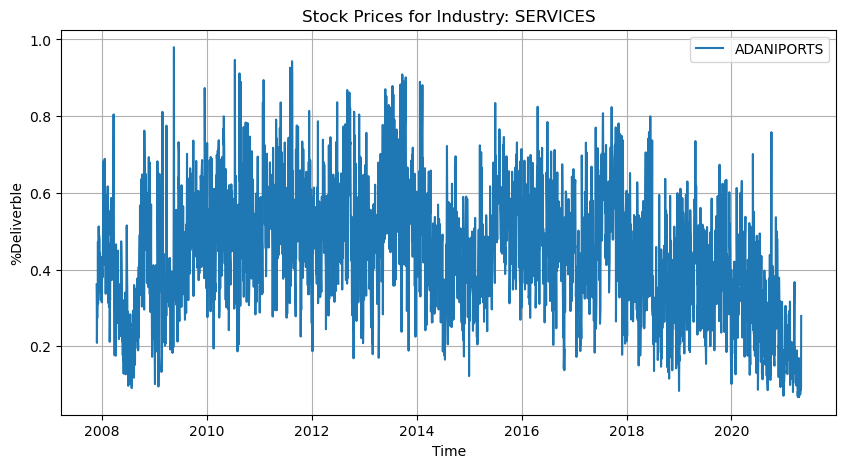

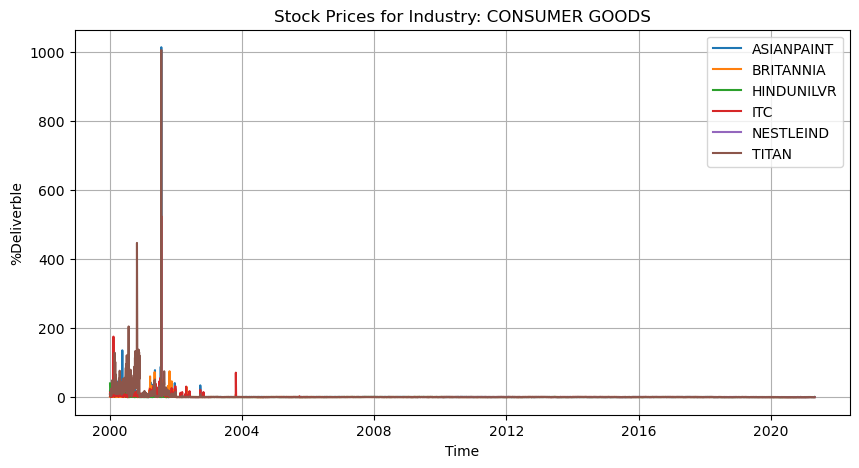

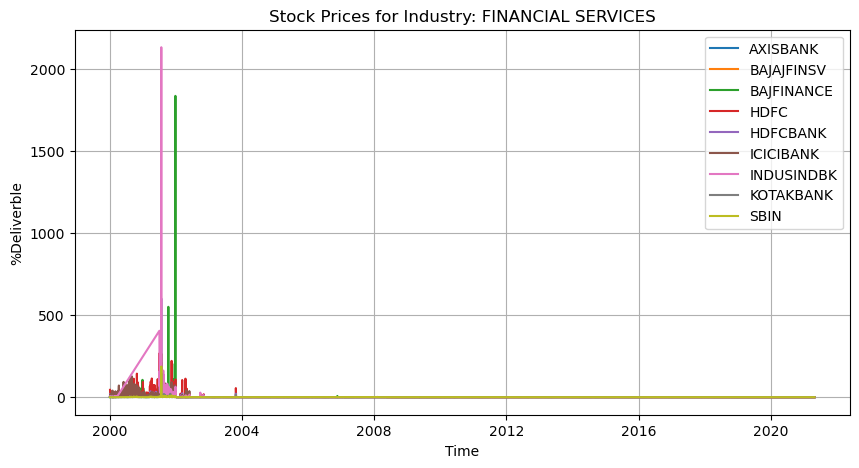

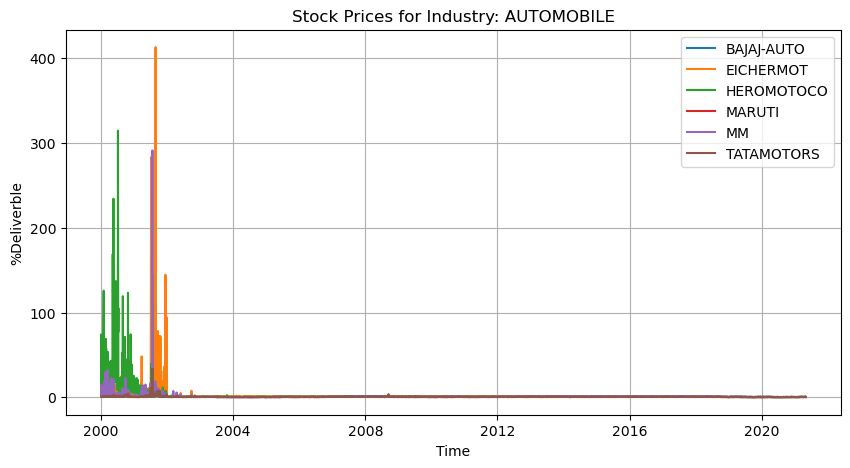

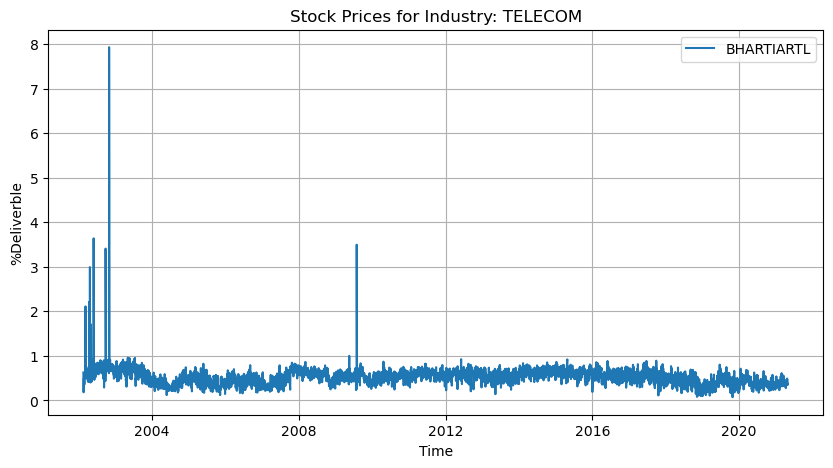

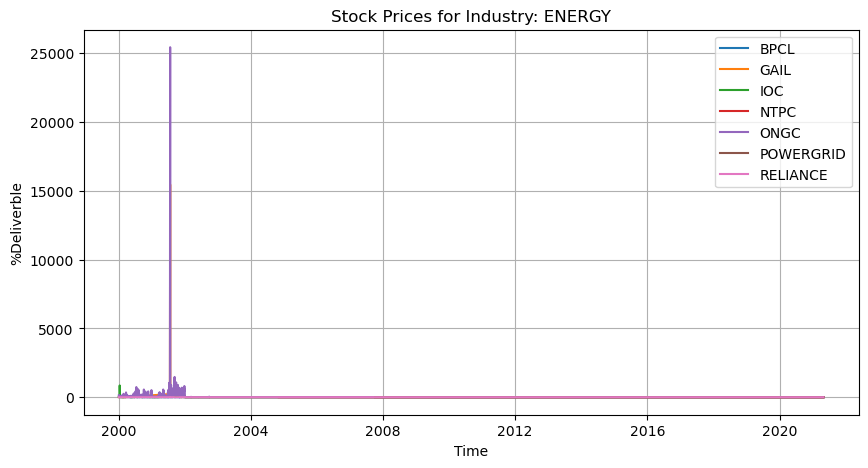

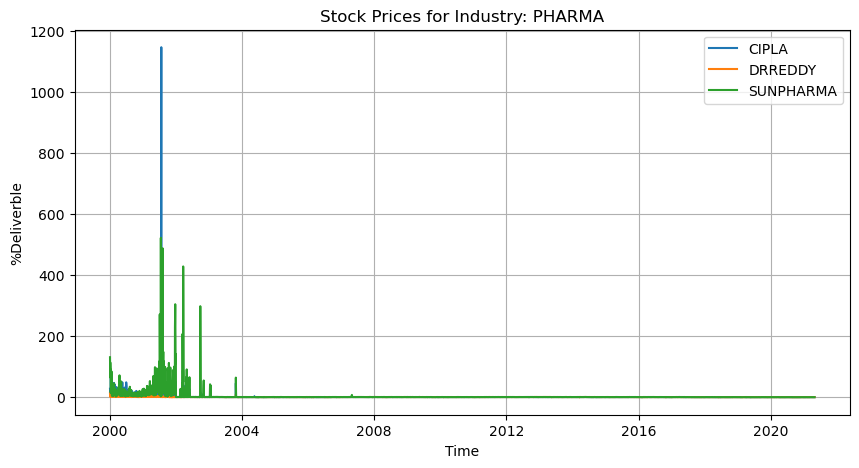

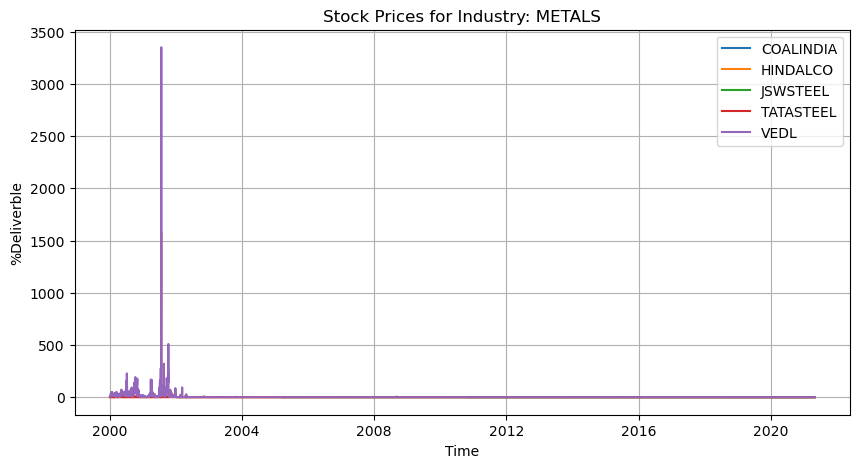

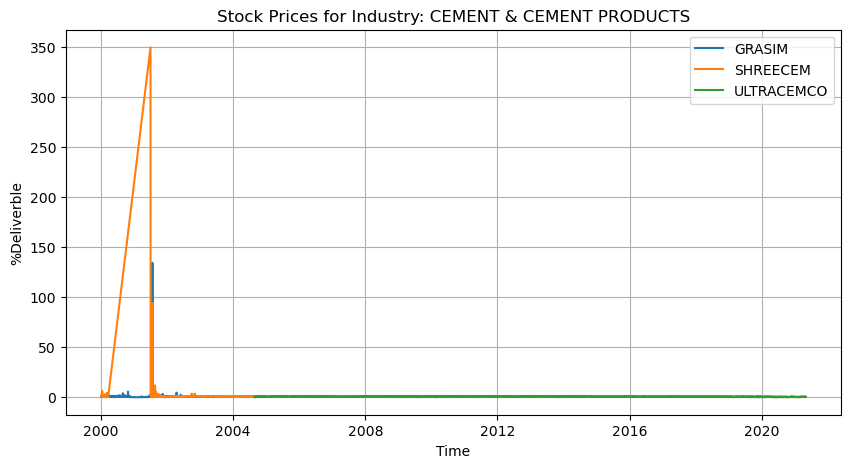

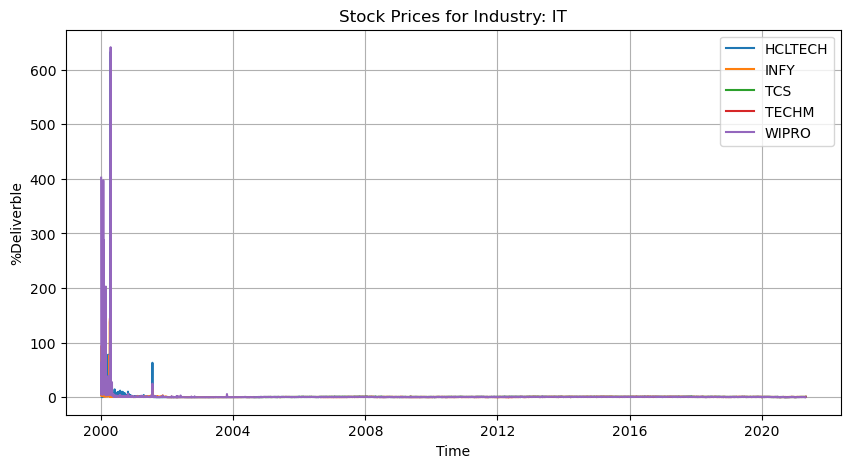

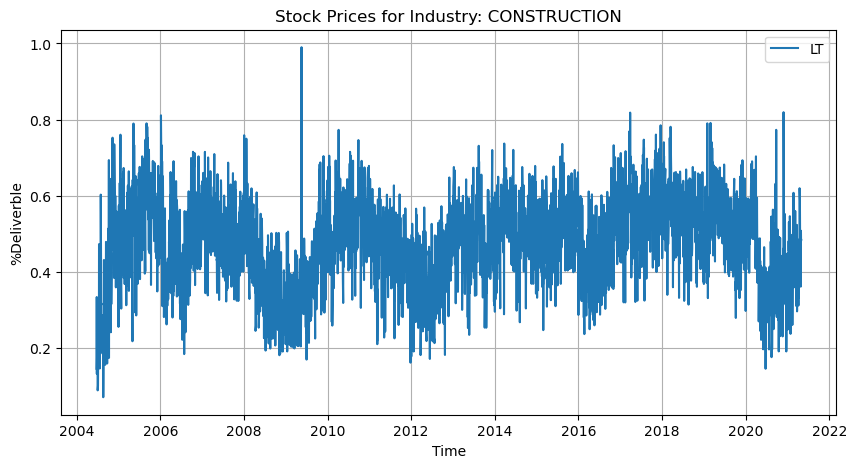

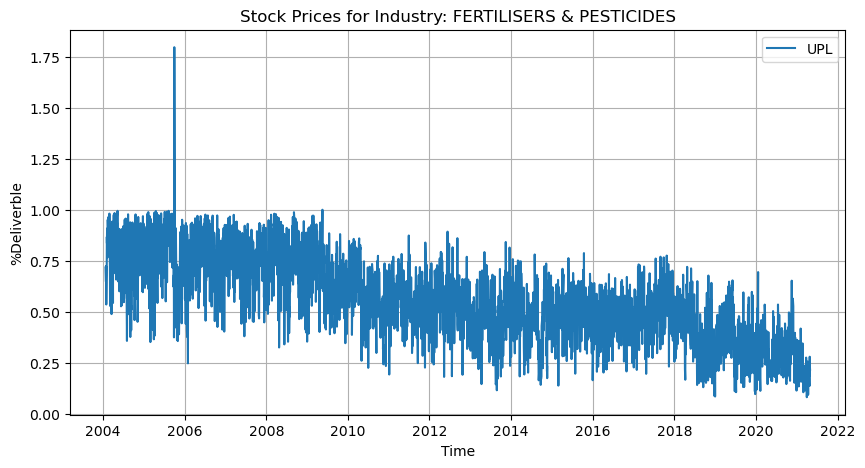

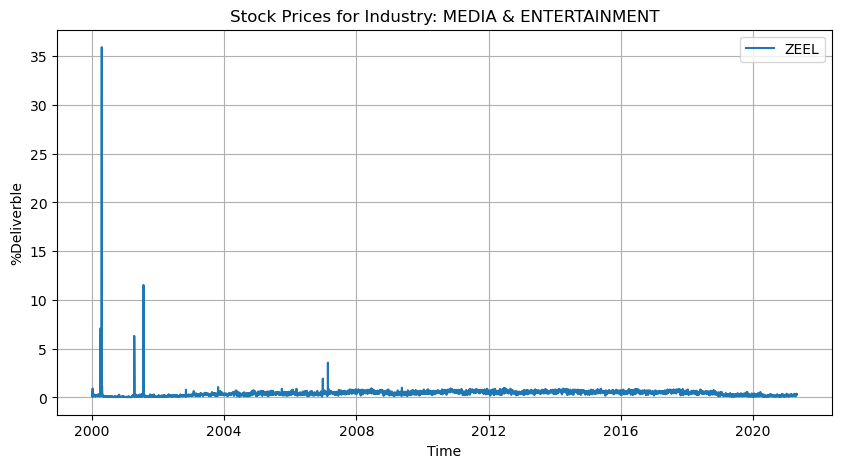

In [107]:
# Loop through each unique Industry
for industry in df['Industry'].unique():
    plt.figure(figsize=(10, 5))  # Create a new figure for each industry
    
    # Filter data for the specific industry
    industry_data = df[df['Industry'] == industry]

    # Loop through each stock in the industry
    for symbol in industry_data['Modified_Symbol'].unique():
        symbol_data = industry_data[industry_data['Modified_Symbol'] == symbol]
        plt.plot(symbol_data['%Deliverble'], label=symbol)  # Plot each stock
    
    # Set labels, title, legend
    plt.xlabel("Time")
    plt.ylabel("%Deliverble")
    plt.title(f"Stock Prices for Industry: {industry}")
    plt.legend()
    plt.grid(True)

    # Show the graph after all stocks of an industry are plotted
    plt.show()

In [108]:
# Highest Cumulative Returns
final_prices = df.groupby('Modified_Symbol')['Close'].last()
initial_prices = df.groupby('Modified_Symbol')['Close'].first()

cumulative_returns = ((final_prices - initial_prices) / initial_prices) * 100
top_5_stocks = cumulative_returns.nlargest(5)
print('Highest Cumulative Returns','\n',top_5_stocks,'\n')

# Highest Average Daily Return
df['Daily_Return'] = df.groupby('Modified_Symbol')['Close'].pct_change() * 100
average_daily_return = df.groupby('Modified_Symbol')['Daily_Return'].mean()
top_5_stocks = average_daily_return.nlargest(5)
print('Highest Average Daily Return','\n',top_5_stocks,'\n')

# Risk-Adjusted Performance (Sharpe Ratio)
mean_returns = df.groupby('Modified_Symbol')['Daily_Return'].mean()
std_dev_returns = df.groupby('Modified_Symbol')['Daily_Return'].std()
sharpe_ratio = mean_returns / std_dev_returns
top_5_stocks = sharpe_ratio.nlargest(5)
print('Sharpe Ratio','\n',top_5_stocks)



Highest Cumulative Returns 
 Modified_Symbol
SHREECEM      43005.019305
BAJFINANCE    10642.660099
EICHERMOT      4857.318321
MARUTI         3829.184419
INDUSINDBK     3129.533679
Name: Close, dtype: float64 

Highest Average Daily Return 
 Modified_Symbol
BAJFINANCE    0.154723
SHREECEM      0.151705
EICHERMOT     0.137714
BAJAJFINSV    0.128234
INDUSINDBK    0.122159
Name: Daily_Return, dtype: float64 

Sharpe Ratio 
 Modified_Symbol
SHREECEM      0.061803
NESTLEIND     0.051471
BAJAJFINSV    0.050772
BAJFINANCE    0.050475
MARUTI        0.049041
Name: Daily_Return, dtype: float64


In [109]:
Q1 = df['Daily Return'].quantile(0.25)
Q3 = df['Daily Return'].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['Daily Return'] >= lower_bound) & (df['Daily Return'] <= upper_bound)]


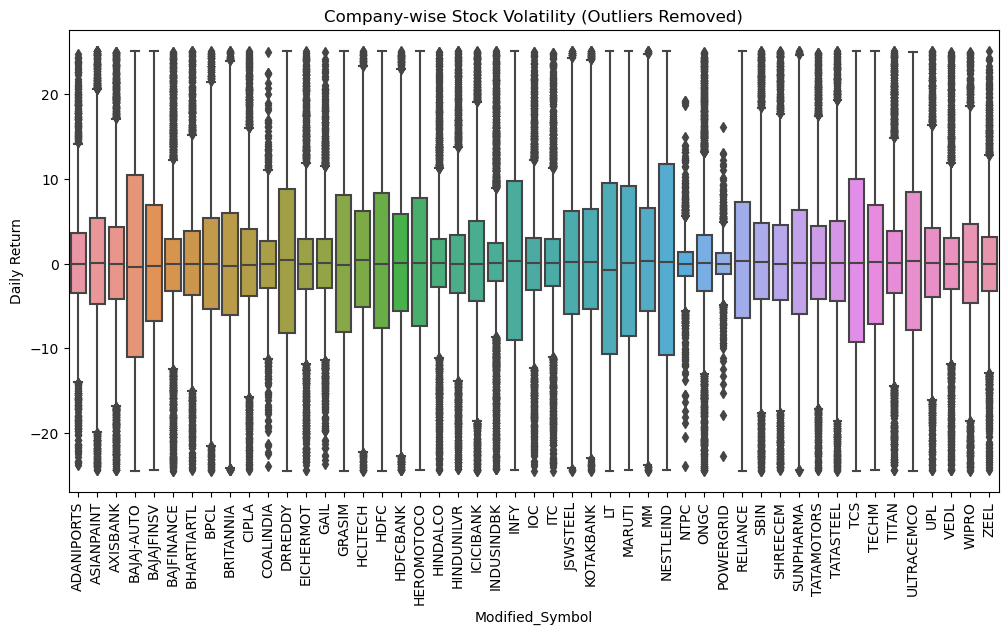

In [110]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='Modified_Symbol', y='Daily Return', data=df_filtered)
plt.xticks(rotation=90)
plt.title("Company-wise Stock Volatility (Outliers Removed)")
plt.show()

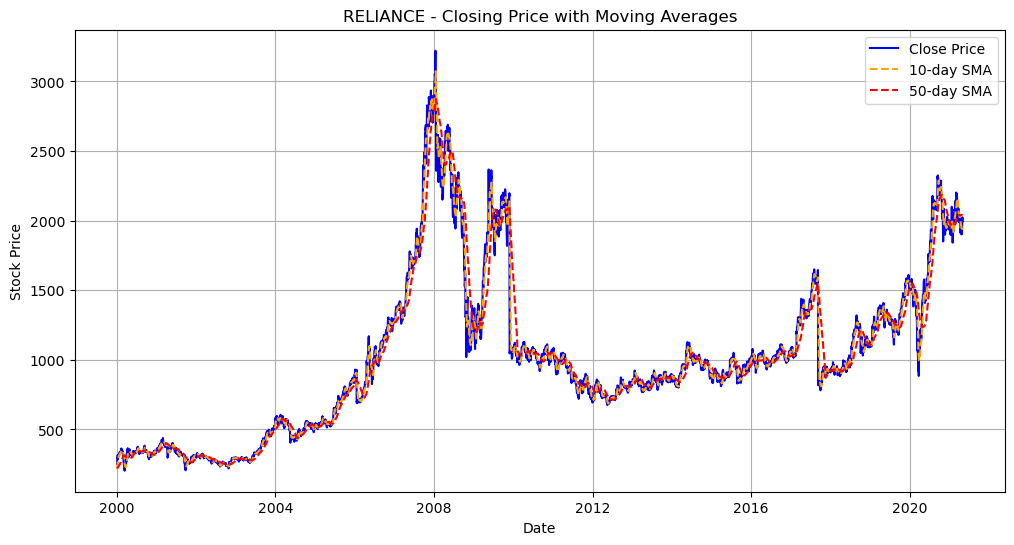

In [111]:
def plot_stock_trends(symbol, df):
    plt.figure(figsize=(12,6))
    
    stock_df = df[df['Modified_Symbol'] == symbol]
    
    plt.plot(stock_df.index, stock_df['Close'], label='Close Price', color='blue')
    plt.plot(stock_df.index, stock_df['SMA_10'], label='10-day SMA', linestyle='--', color='orange')
    plt.plot(stock_df.index, stock_df['SMA_50'], label='50-day SMA', linestyle='--', color='red')
    
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title(f'{symbol} - Closing Price with Moving Averages')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example: Plot for RELIANCE
plot_stock_trends('RELIANCE', df)

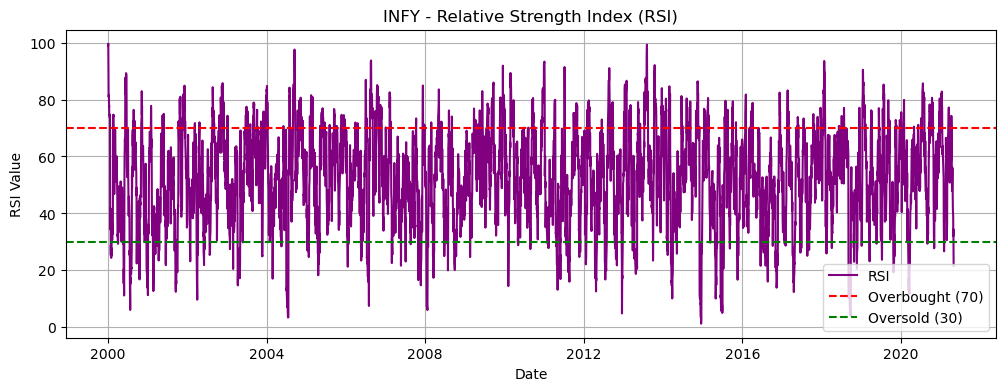

In [112]:
def plot_rsi(symbol, df):
    plt.figure(figsize=(12,4))

    stock_df = df[df['Modified_Symbol'] == symbol]
    
    plt.plot(stock_df.index, stock_df['RSI'], label='RSI', color='purple')
    plt.axhline(y=70, color='red', linestyle='--', label='Overbought (70)')
    plt.axhline(y=30, color='green', linestyle='--', label='Oversold (30)')

    plt.xlabel('Date')
    plt.ylabel('RSI Value')
    plt.title(f'{symbol} - Relative Strength Index (RSI)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example: Plot for INFY
plot_rsi('INFY', df)


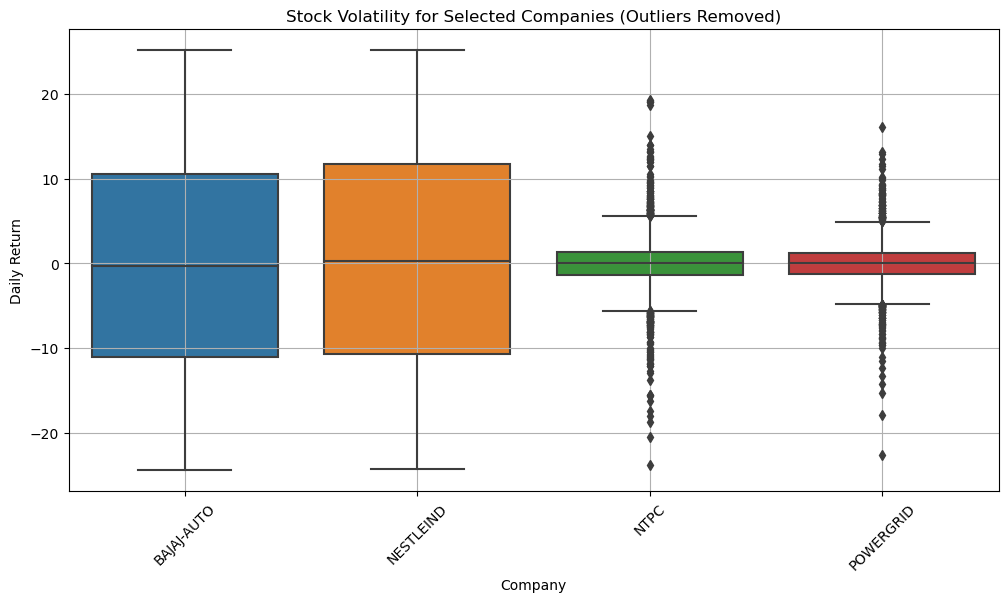

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataset for the selected companies
selected_companies = ['NESTLEIND', 'BAJAJ-AUTO', 'NTPC', 'POWERGRID']
df_selected = df_filtered[df_filtered['Modified_Symbol'].isin(selected_companies)]

# Plot the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Modified_Symbol', y='Daily Return', data=df_selected)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title("Stock Volatility for Selected Companies (Outliers Removed)")
plt.xlabel("Company")
plt.ylabel("Daily Return")
plt.grid(True)
plt.show()


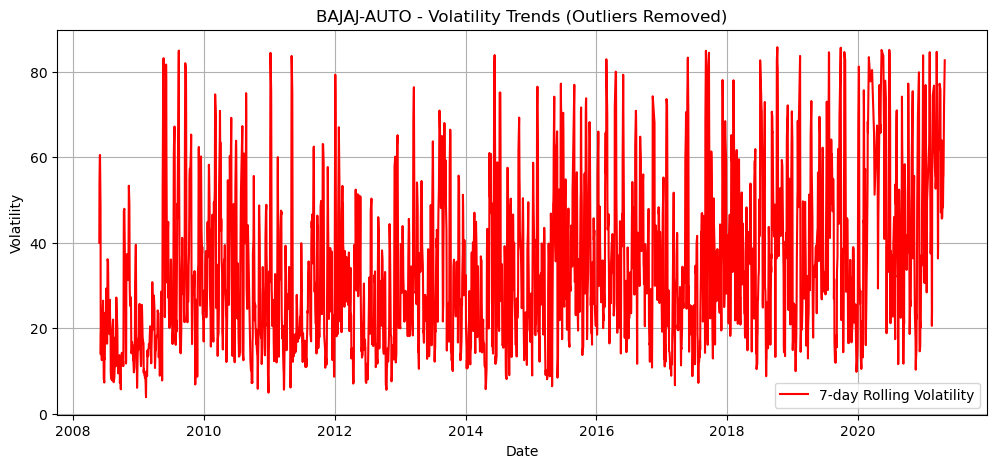

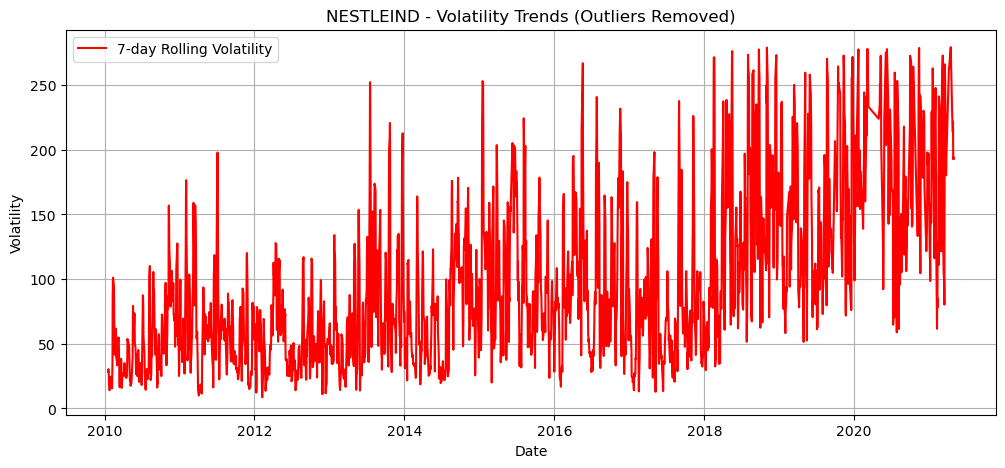

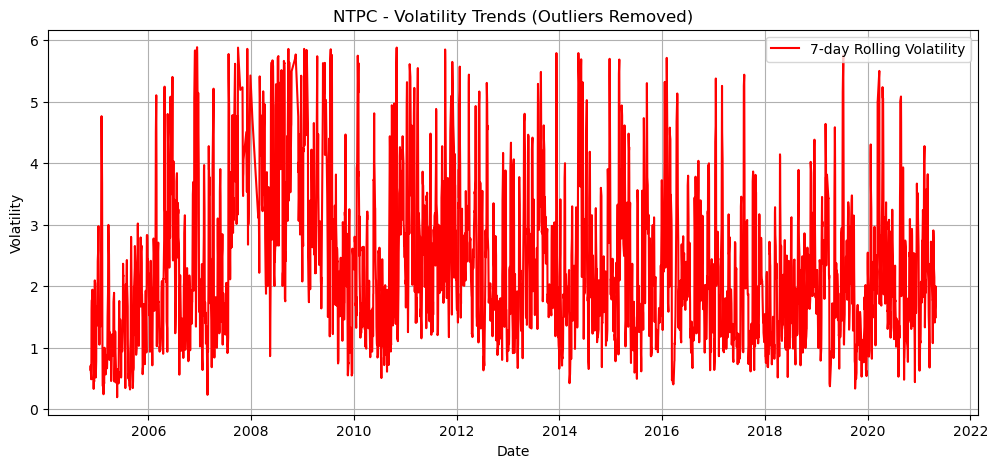

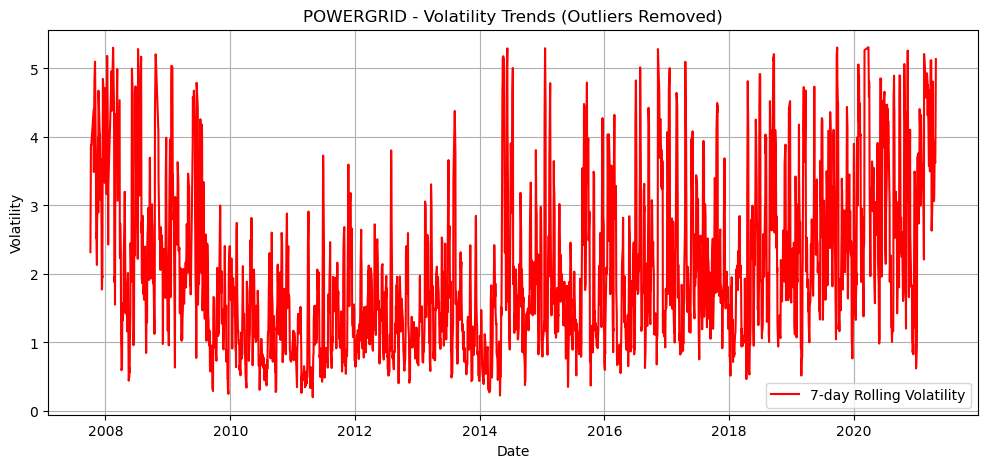

In [123]:
def plot_volatility(symbol, df, remove_outliers=True):
    plt.figure(figsize=(12,5))
    stock_df = df[df['Modified_Symbol'] == symbol].copy()
    
    # IQR-Based Outlier Removal
    if remove_outliers:
        Q1 = stock_df['Volatility'].quantile(0.25)
        Q3 = stock_df['Volatility'].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        stock_df = stock_df[(stock_df['Volatility'] >= lower_bound) & (stock_df['Volatility'] <= upper_bound)]
    
    # Plot cleaned data
    plt.plot(stock_df.index, stock_df['Volatility'], label='7-day Rolling Volatility', color='red')

    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.title(f'{symbol} - Volatility Trends (Outliers Removed)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example: Plot for TCS with outlier removal
plot_volatility('BAJAJ-AUTO', df, remove_outliers=True)
plot_volatility('NESTLEIND', df, remove_outliers=True)
plot_volatility('NTPC', df, remove_outliers=True)
plot_volatility('POWERGRID', df, remove_outliers=True)

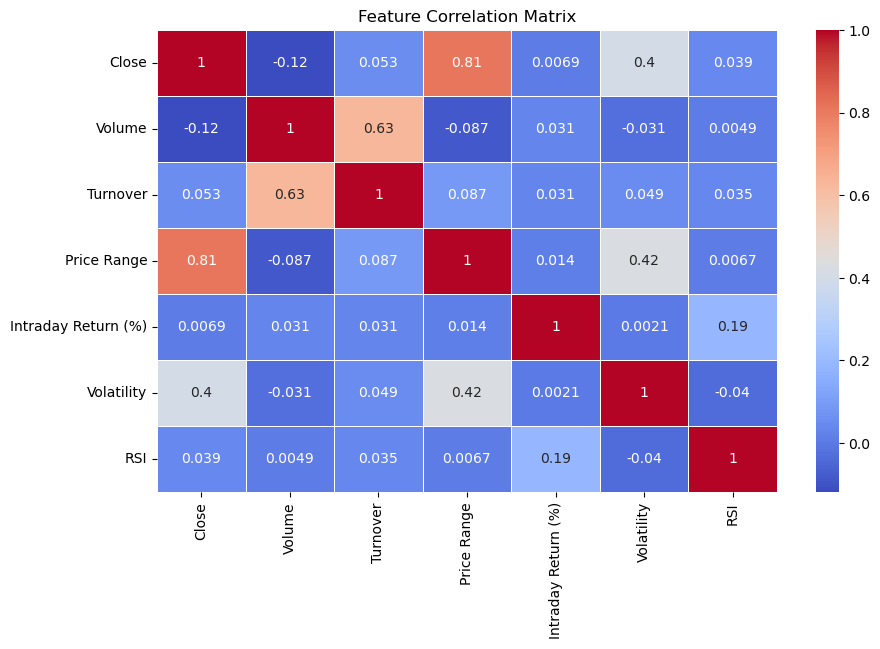

In [114]:
# Selecting relevant numerical columns
corr_features = ['Close', 'Volume', 'Turnover', 'Price Range', 'Intraday Return (%)', 'Volatility', 'RSI']
corr_matrix = df[corr_features].corr()

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()


In [115]:
# Get unique stock symbols
stock_symbols = df['Modified_Symbol'].unique()
print(f"Total Unique Stocks: {len(stock_symbols)}")

Total Unique Stocks: 49


In [125]:
def train_lstm_for_stock(stock_symbol, df, time_steps=60, epochs=20, batch_size=32):
    print(f"\nTraining LSTM for Stock: {stock_symbol}")

    # Filter dataset for the specific stock
    stock_data = df[df['Modified_Symbol'] == stock_symbol].copy()

    # Ensure index is in datetime format
    stock_data = stock_data.sort_index()  # Ensure proper time ordering
    stock_data.index = pd.to_datetime(stock_data.index)

    # Normalize only 'Open' prices
    scaler = MinMaxScaler(feature_range=(0, 1))
    stock_data['Open_Scaled'] = scaler.fit_transform(stock_data[['Open']])

    # Train-test split (80% train, 20% test)
    split = int(0.8 * len(stock_data))
    train_data, test_data = stock_data['Open_Scaled'][:split], stock_data['Open_Scaled'][split:]

    # Function to create sequences
    def create_sequences(data, time_steps):
        X, y = [], []
        for i in range(len(data) - time_steps):
            X.append(data[i:i+time_steps])  # Past `time_steps` days
            y.append(data[i+time_steps])    # Next day's Open price
        return np.array(X), np.array(y)

    # Generate sequences
    X_train, y_train = create_sequences(train_data.values, time_steps)
    X_test, y_test = create_sequences(test_data.values, time_steps)

    # Reshape for LSTM input (samples, time_steps, features=1)
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    # Build LSTM model
    model = Sequential([
        LSTM(units=50, return_sequences=True, input_shape=(time_steps, 1)),
        Dropout(0.2),
        LSTM(units=20, return_sequences=True),
        Dropout(0.2),
        LSTM(units=50),
        Dropout(0.2),
        Dense(units=25),
        Dense(units=1)  # Predict next day's Open price
    ])

    # Compile Model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train Model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)

    # Plot loss curve
    plt.figure(figsize=(8,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.legend()
    plt.title(f"Loss Curve for {stock_symbol}")
    plt.show()

    # Predict
    y_pred = model.predict(X_test)

    # Inverse transform predictions & actual values
    y_pred = scaler.inverse_transform(y_pred)
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Extract corresponding dates for test set
    test_dates = stock_data.index[-len(y_test_actual):]  # Extract dates for test set

    # Plot Actual vs Predicted Prices with Date on X-axis
    plt.figure(figsize=(12,6))
    plt.plot(test_dates, y_test_actual, label="Actual Open Price", color='blue')
    plt.plot(test_dates, y_pred, label="Predicted Open Price", color='red')
    plt.xlabel("Date")  # Label x-axis
    plt.ylabel("Open Price")  # Label y-axis
    plt.legend()
    plt.xticks(rotation=45)  # Rotate dates for better readability
    plt.title(f"Actual vs Predicted Open Price for {stock_symbol}")
    plt.show()

    # Forecast Next Day
    last_60_days = stock_data['Open_Scaled'].values[-time_steps:].reshape(1, time_steps, 1)
    next_day_price = model.predict(last_60_days)
    next_day_price = scaler.inverse_transform(next_day_price)

    print(f"Predicted Open Price for {stock_symbol} (Next Day): {next_day_price[0][0]:.2f}")

    return model



Training LSTM for Stock: MARUTI
Epoch 1/20


C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


109/109 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 0.0129 - val_loss: 0.0044
Epoch 2/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 8.3153e-04 - val_loss: 0.0017
Epoch 3/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 6.6233e-04 - val_loss: 0.0026
Epoch 4/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 5.1446e-04 - val_loss: 0.0016
Epoch 5/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 5.6563e-04 - val_loss: 0.0014
Epoch 6/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 5.1030e-04 - val_loss: 0.0014
Epoch 7/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 4.3457e-04 - val_loss: 0.0015
Epoch 8/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 4.1885e-04 - val_loss: 0.0013
Epoch 9/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 4.4339e-04 - val_loss: 0.0028
Epoch 10/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 4.5147e-04 - val_loss: 0.0021
Epoch 11/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 4.0198e-04 - val_loss: 0.0013
Epoch 12/20

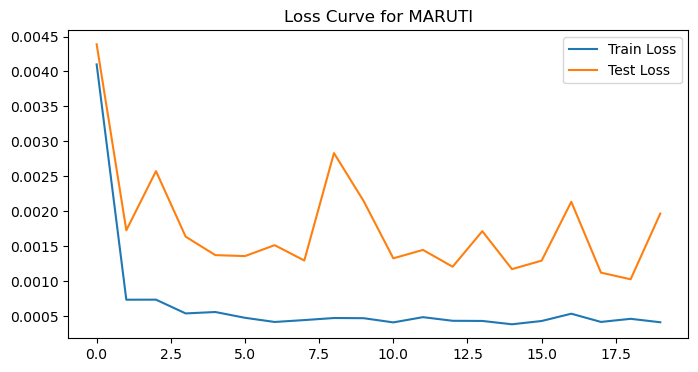

26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step


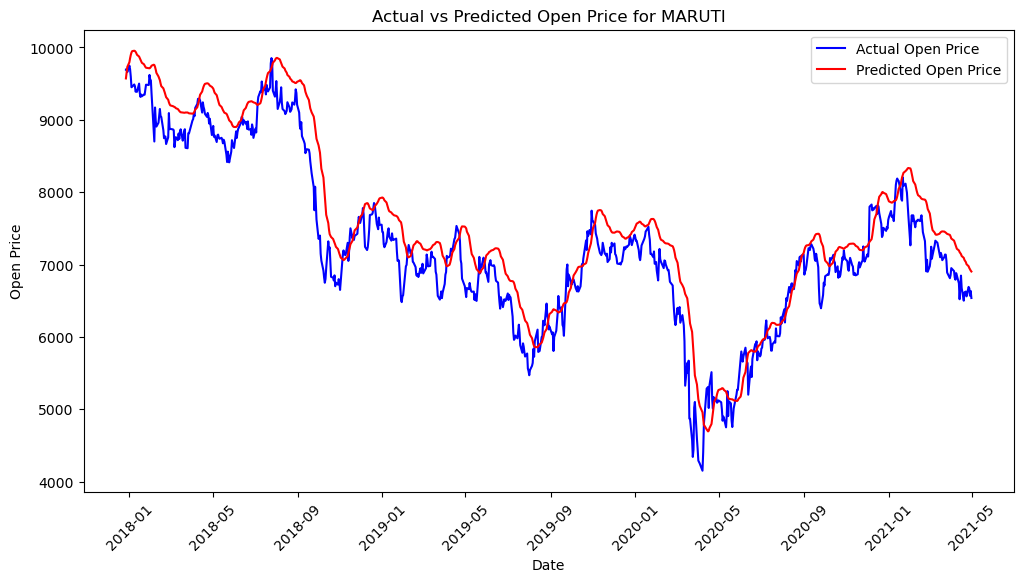

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted Open Price for MARUTI (Next Day): 6891.02

Training LSTM for Stock: SHREECEM
Epoch 1/20


C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


123/123 ━━━━━━━━━━━━━━━━━━━━ 16s 73ms/step - loss: 0.0055 - val_loss: 0.0032
Epoch 2/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - loss: 5.1857e-04 - val_loss: 0.0030
Epoch 3/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - loss: 3.4435e-04 - val_loss: 0.0015
Epoch 4/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - loss: 3.1688e-04 - val_loss: 0.0020
Epoch 5/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - loss: 2.9433e-04 - val_loss: 0.0016
Epoch 6/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - loss: 2.9802e-04 - val_loss: 0.0015
Epoch 7/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - loss: 4.7633e-04 - val_loss: 0.0016
Epoch 8/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - loss: 3.0383e-04 - val_loss: 0.0036
Epoch 9/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - loss: 3.2509e-04 - val_loss: 0.0022
Epoch 10/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - loss: 3.1496e-04 - val_loss: 0.0018
Epoch 11/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - loss: 2.8294e-04 - val_loss: 0.0015
Epoch 12/20

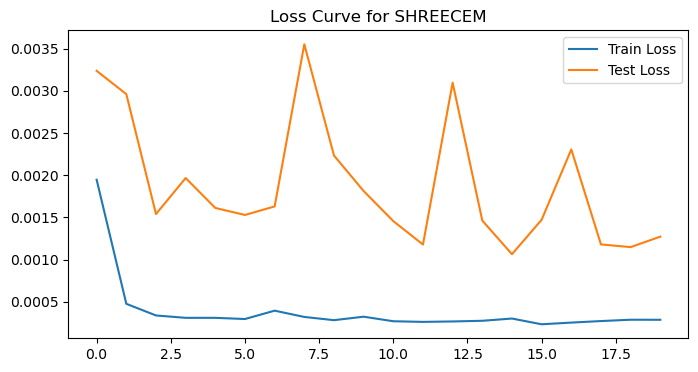

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


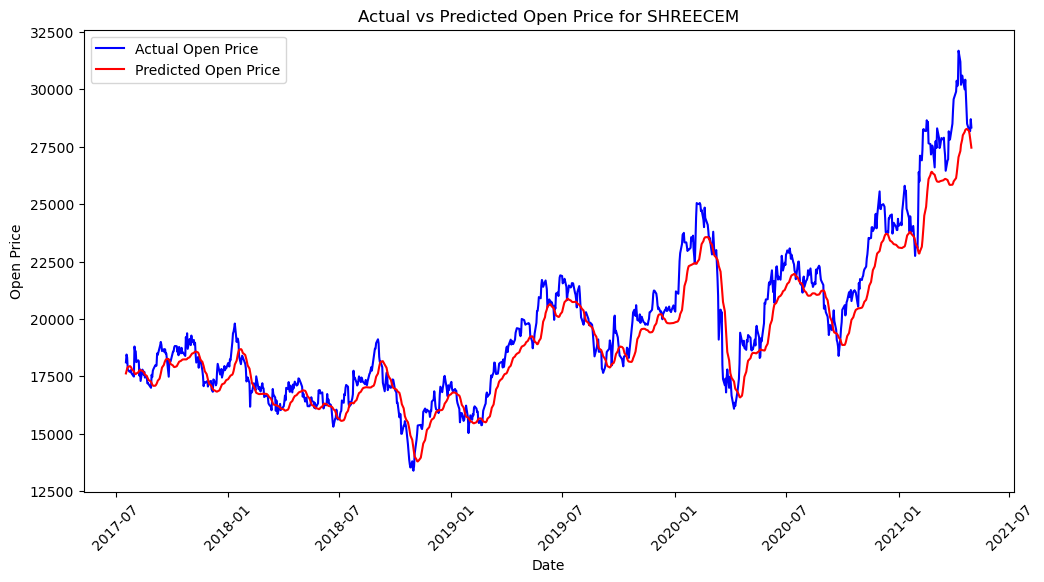

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predicted Open Price for SHREECEM (Next Day): 27274.89

Training LSTM for Stock: INDUSINDBK
Epoch 1/20


C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


123/123 ━━━━━━━━━━━━━━━━━━━━ 15s 68ms/step - loss: 0.0059 - val_loss: 0.0036
Epoch 2/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - loss: 6.6146e-04 - val_loss: 0.0033
Epoch 3/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 5.6148e-04 - val_loss: 0.0026
Epoch 4/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - loss: 4.7087e-04 - val_loss: 0.0032
Epoch 5/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - loss: 4.6916e-04 - val_loss: 0.0025
Epoch 6/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - loss: 3.8381e-04 - val_loss: 0.0036
Epoch 7/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - loss: 3.6289e-04 - val_loss: 0.0022
Epoch 8/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - loss: 4.8773e-04 - val_loss: 0.0027
Epoch 9/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - loss: 4.1257e-04 - val_loss: 0.0038
Epoch 10/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - loss: 4.5557e-04 - val_loss: 0.0020
Epoch 11/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - loss: 3.7583e-04 - val_loss: 0.0019
Epoch 12/2

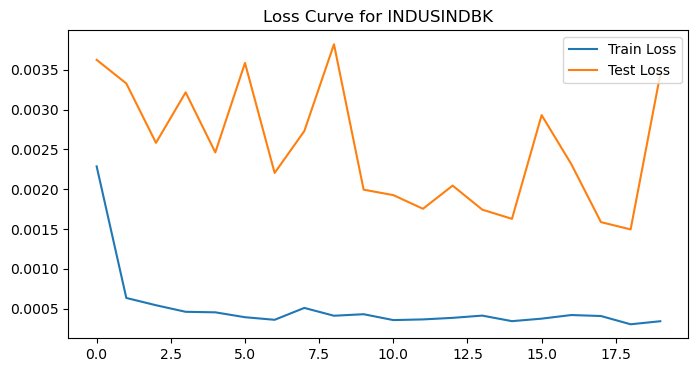

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


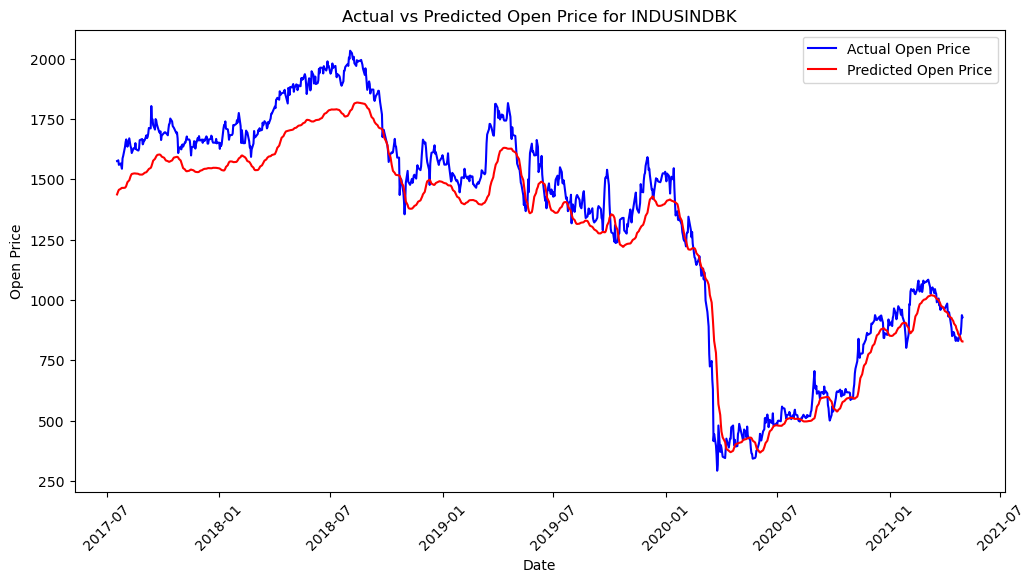

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted Open Price for INDUSINDBK (Next Day): 830.70

Training LSTM for Stock: BAJAJFINSV
Epoch 1/20


C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - loss: 0.0080 - val_loss: 0.0045
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 5.9301e-04 - val_loss: 0.0046
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 7.5353e-04 - val_loss: 0.0062
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 4.9349e-04 - val_loss: 0.0036
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 5.1378e-04 - val_loss: 0.0034
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 4.4471e-04 - val_loss: 0.0053
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 3.9518e-04 - val_loss: 0.0031
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 4.7941e-04 - val_loss: 0.0035
Epoch 9/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 4.3367e-04 - val_loss: 0.0080
Epoch 10/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 4.7253e-04 - val_loss: 0.0030
Epoch 11/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 4.1766e-04 - val_loss: 0.0033
Epoch 12/20
79/79 ━━━━━━━━━━━━━━━

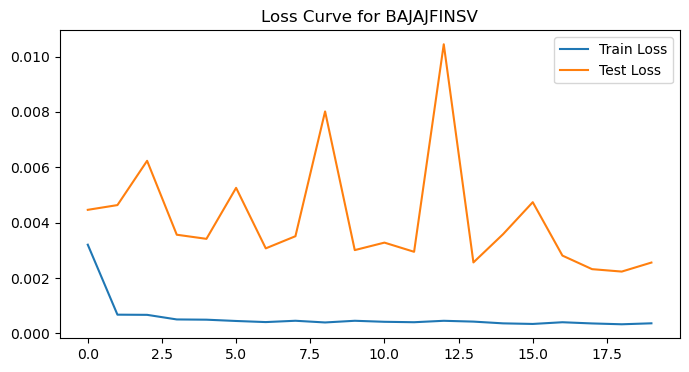

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


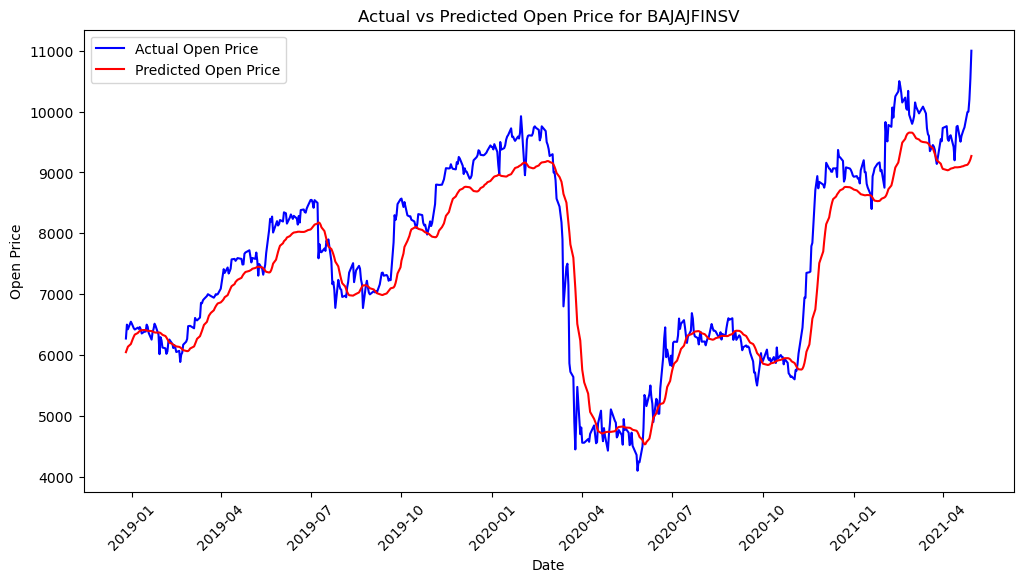

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted Open Price for BAJAJFINSV (Next Day): 9349.04

Training LSTM for Stock: EICHERMOT
Epoch 1/20


C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


131/131 ━━━━━━━━━━━━━━━━━━━━ 14s 67ms/step - loss: 0.0092 - val_loss: 0.0079
Epoch 2/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 6.4803e-04 - val_loss: 0.0099
Epoch 3/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 7.0771e-04 - val_loss: 0.0055
Epoch 4/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - loss: 5.8236e-04 - val_loss: 0.0052
Epoch 5/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - loss: 5.6699e-04 - val_loss: 0.0064
Epoch 6/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - loss: 5.4115e-04 - val_loss: 0.0049
Epoch 7/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - loss: 6.0917e-04 - val_loss: 0.0052
Epoch 8/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 5.0654e-04 - val_loss: 0.0050
Epoch 9/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - loss: 6.0963e-04 - val_loss: 0.0052
Epoch 10/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - loss: 4.7512e-04 - val_loss: 0.0083
Epoch 11/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 5.9339e-04 - val_loss: 0.0050
Epoch 12/20

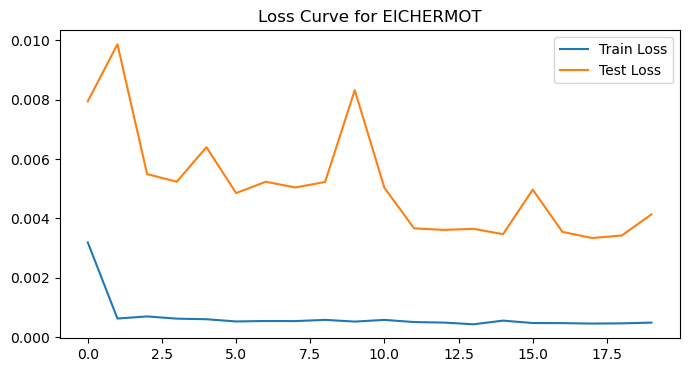

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step


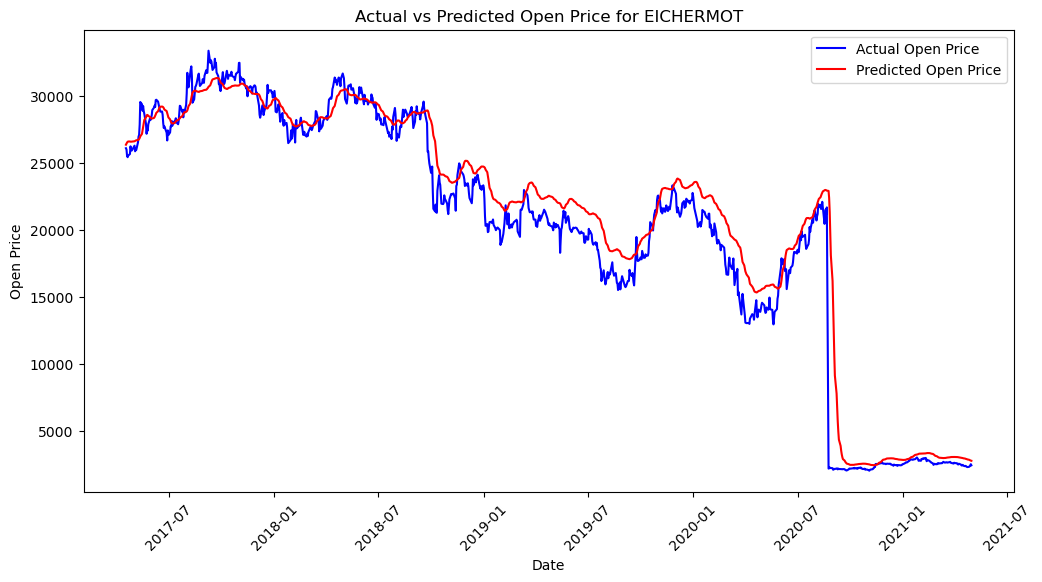

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted Open Price for EICHERMOT (Next Day): 2777.12

Training LSTM for Stock: BAJFINANCE
Epoch 1/20


C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.0060 - val_loss: 7.0188e-04
Epoch 2/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0025 - val_loss: 6.0459e-04
Epoch 3/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0013 - val_loss: 8.5400e-04
Epoch 4/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.0016 - val_loss: 3.7499e-04
Epoch 5/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0014 - val_loss: 2.8505e-04
Epoch 6/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 9.1465e-04 - val_loss: 2.3296e-04
Epoch 7/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0014 - val_loss: 8.4067e-04
Epoch 8/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 9/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 9.5095e-04 - val_loss: 2.0932e-04
Epoch 10/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0010 - val_loss: 4.5160e-04
Epoch 11/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.0011 - val_loss: 1.9393e-04
Epo

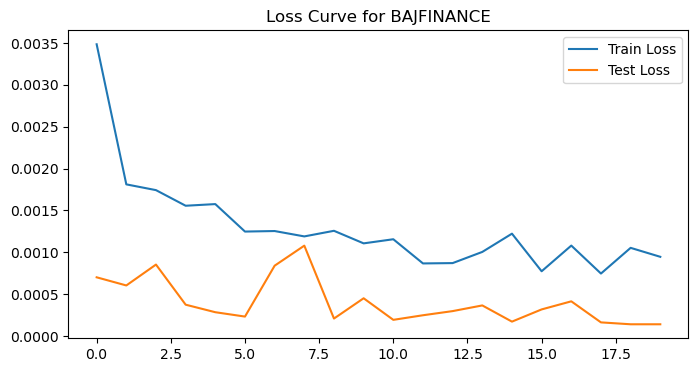

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


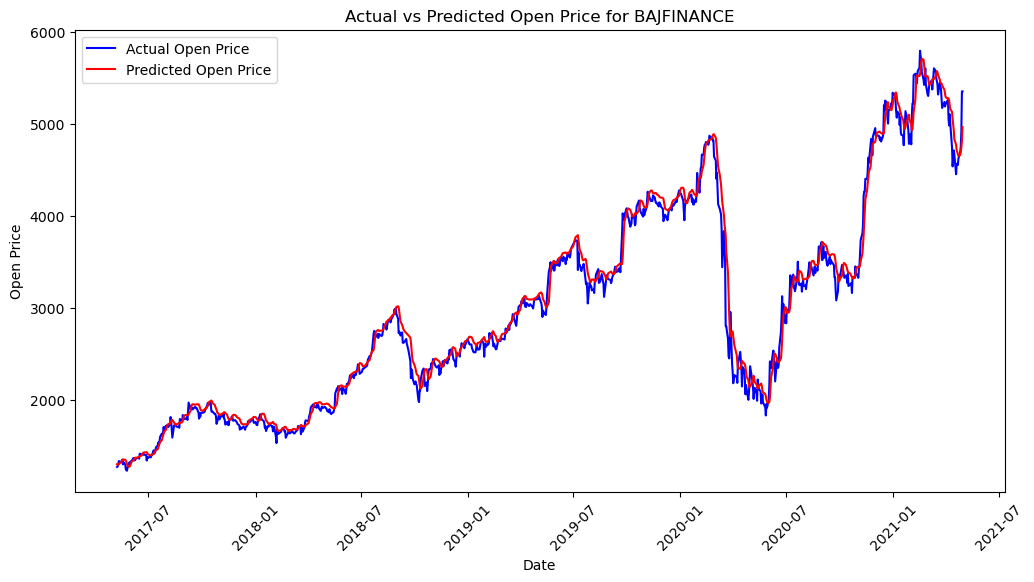

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted Open Price for BAJFINANCE (Next Day): 5135.06


In [127]:
# Get the top 5 stocks based on cumulative returns
final_prices = df.groupby('Modified_Symbol')['Close'].last()
initial_prices = df.groupby('Modified_Symbol')['Close'].first()
cumulative_returns = ((final_prices - initial_prices) / initial_prices) * 100
top_5_cumulative = cumulative_returns.nlargest(5).index.tolist()

# Get the top 5 stocks based on average daily return
df['Daily_Return'] = df.groupby('Modified_Symbol')['Close'].pct_change() * 100
average_daily_return = df.groupby('Modified_Symbol')['Daily_Return'].mean()
top_5_avg_daily = average_daily_return.nlargest(5).index.tolist()

# Combine both lists (unique stocks only)
selected_stocks = list(set(top_5_cumulative + top_5_avg_daily))

# Train model only for selected stocks
for stock in selected_stocks:
    train_lstm_for_stock(stock, df)